In [1]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn import datasets, metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check data in folder train


In [3]:
fruits_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/fruits')
cat_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/cat')
dog_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/dog')
beach_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/beach')
bill_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/bill')
bookjacket_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/bookjacket')
car_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/car')
clothes_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/clothes')
drink_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/drink')
feast_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/feast')
field_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/field')
flower_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/flower')
food_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/food')
house_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/house')
jewels_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/jewels')
motorcycle_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/motorcycle')
mountain_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/mountain')
papers_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/papers')
person_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/person')
shoe_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/shoe')
truck_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/truck')

In [4]:
print('Total training fruits images:', len(os.listdir(fruits_dir)))
print('Total training cat images:', len(os.listdir(cat_dir)))
print('Total training dog images:', len(os.listdir(dog_dir)))
print('Total training beach images:', len(os.listdir(beach_dir)))
print('Total training bill images:', len(os.listdir(bill_dir)))
print('Total training bookjacket images:', len(os.listdir(bookjacket_dir)))
print('Total training car images:', len(os.listdir(car_dir)))
print('Total training clothes images:', len(os.listdir(clothes_dir)))
print('Total training drink images:', len(os.listdir(drink_dir)))
print('Total training feast images:', len(os.listdir(feast_dir)))
print('Total training field images:', len(os.listdir(field_dir)))
print('Total training flower images:', len(os.listdir(flower_dir)))
print('Total training food images:', len(os.listdir(food_dir)))
print('Total training house images:', len(os.listdir(house_dir)))
print('Total training jewels images:', len(os.listdir(jewels_dir)))
print('Total training motorcycle images:', len(os.listdir(motorcycle_dir)))
print('Total training mountain images:', len(os.listdir(mountain_dir)))
print('Total training papers images:', len(os.listdir(papers_dir)))
print('Total training person images:', len(os.listdir(person_dir)))
print('Total training shoe images:', len(os.listdir(shoe_dir)))
print('Total training truck images:', len(os.listdir(truck_dir)))


Total training fruits images: 157
Total training cat images: 316
Total training dog images: 293
Total training beach images: 287
Total training bill images: 108
Total training bookjacket images: 217
Total training car images: 114
Total training clothes images: 188
Total training drink images: 167
Total training feast images: 110
Total training field images: 126
Total training flower images: 276
Total training food images: 218
Total training house images: 111
Total training jewels images: 117
Total training motorcycle images: 211
Total training mountain images: 107
Total training papers images: 125
Total training person images: 184
Total training shoe images: 355
Total training truck images: 149


## Data train


In [5]:
imagePaths = ['beach', 'bill', 'bookjacket', 'car', 'cat', 'clothes', 'dog', 'drink','feast', 'field', 'flower', 'food', 'fruits', 'house', 'jewels', 'motorcycle', 'mountain', 'papers', 'person', 'shoe', 'truck']

In [6]:
data_train=[]
labels_train=[]

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/train_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/train_dataset/"+img+'/'+i)
        image = cv2.resize(image, (224, 224))
        image = img_to_array(image)
        data_train.append(image)
        l = label = img
        labels_train.append(l)


In [7]:
data_train = np.array(data_train, dtype="float32") / 255.0
labels_train = np.array(labels_train)
mlb = LabelBinarizer()
labels_train = mlb.fit_transform(labels_train)
print(labels_train[0])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
print('total file train:',len(data_train))


total file train: 3936


## Data test

In [9]:
data_test=[]
labels_test=[]

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/test_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/test_dataset/"+img+'/'+i)
        image = cv2.resize(image, (224, 224))
        image = img_to_array(image)
        data_test.append(image)
        l = label = img
        labels_test.append(l)

In [10]:
data_test = np.array(data_test, dtype="float32") / 255.0
labels_test = np.array(labels_test)
mlb = LabelBinarizer()
labels_test = mlb.fit_transform(labels_test)

In [11]:
print('total file test:',len(data_test))

total file test: 600


## InceptionV3


In [30]:
ict_model = InceptionV3(input_shape=[224, 224, 3], weights='imagenet', include_top=False)


for layer in ict_model.layers:
    layer.trainable = False

x = Flatten()(ict_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(21, activation='softmax')(x)

model = Model(inputs=ict_model.input, outputs=prediction)
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [23]:
adam = tensorflow.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [24]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)

In [25]:
%%time
result = model.fit(
               datagen.flow(data_train, labels_train, batch_size=150),
               steps_per_epoch=data_train.shape[0] //224,
               epochs=20,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(data_train, labels_train))

Epoch 1/20

Epoch 00001: val_loss improved from inf to 3.07494, saving model to model.h5
17/17 - 60s - loss: 11.7037 - accuracy: 0.4278 - val_loss: 3.0749 - val_accuracy: 0.7215 - lr: 0.0010 - 60s/epoch - 4s/step
Epoch 2/20

Epoch 00002: val_loss improved from 3.07494 to 1.15293, saving model to model.h5
17/17 - 52s - loss: 2.2662 - accuracy: 0.8247 - val_loss: 1.1529 - val_accuracy: 0.8963 - lr: 0.0010 - 52s/epoch - 3s/step
Epoch 3/20

Epoch 00003: val_loss improved from 1.15293 to 0.56576, saving model to model.h5
17/17 - 53s - loss: 0.9630 - accuracy: 0.9059 - val_loss: 0.5658 - val_accuracy: 0.9362 - lr: 0.0010 - 53s/epoch - 3s/step
Epoch 4/20

Epoch 00004: val_loss improved from 0.56576 to 0.38578, saving model to model.h5
17/17 - 52s - loss: 0.5874 - accuracy: 0.9306 - val_loss: 0.3858 - val_accuracy: 0.9492 - lr: 0.0010 - 52s/epoch - 3s/step
Epoch 5/20

Epoch 00005: val_loss improved from 0.38578 to 0.23419, saving model to model.h5
17/17 - 52s - loss: 0.4226 - accuracy: 0.9438 

In [26]:
ypred_test = model.predict(data_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred_test)):
    if np.argmax(ypred_test[i]) == np.argmax(labels_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 600 	accurately-predicted-data: 544 	 wrongly-predicted-data:  56
Accuracy: 90.667 %


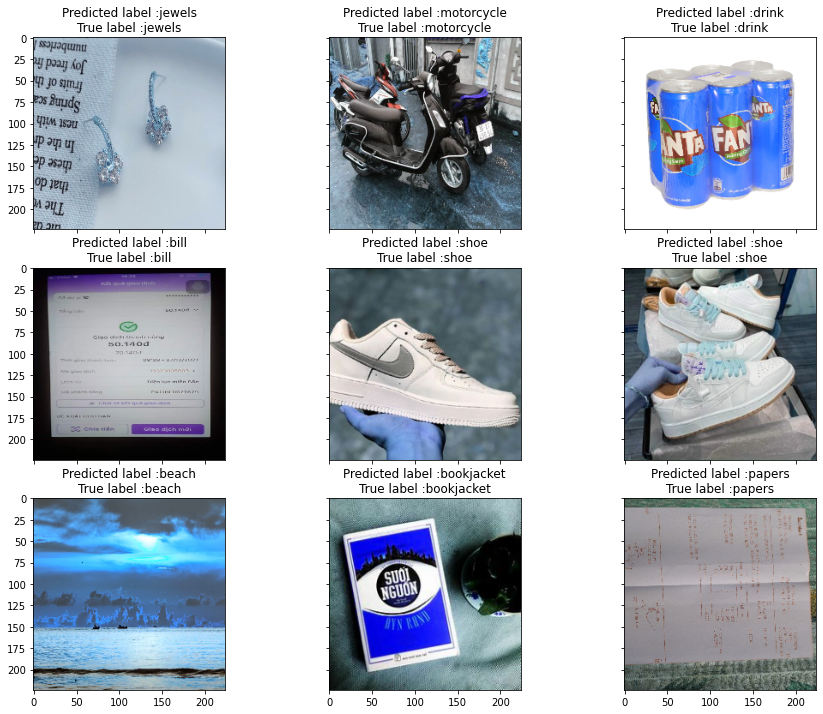

In [27]:
label= ['beach', 'bill', 'bookjacket', 'car', 'cat', 'clothes', 'dog', 'drink','feast', 'field', 'flower', 'food', 'fruits', 'house', 'jewels', 'motorcycle', 'mountain', 'papers', 'person', 'shoe', 'truck']
imidx = random.sample(accurateindex, k=9)# replace with 'wrongindex'

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(data_test[imidx[n]])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred_test[imidx[n]])], label[np.argmax(labels_test[imidx[n]])]))
            n += 1

plt.show()

Text(0.5, 228.47999999999993, 'Predicted')

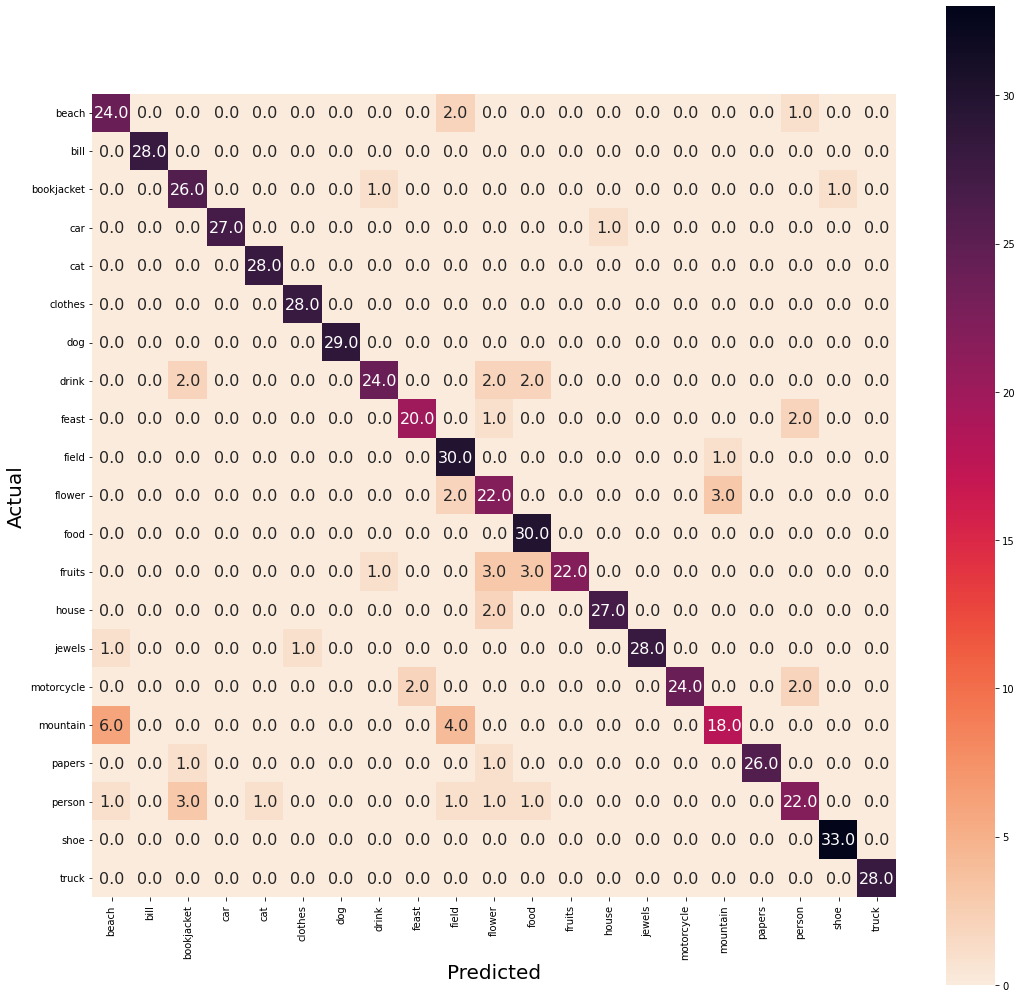

In [28]:
Ypred = model.predict(data_test)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(labels_test, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(18, 18))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [29]:
from sklearn import datasets, metrics
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(Ytrue, Ypred)}\n"
)

Classification report for classifier <keras.engine.functional.Functional object at 0x7fd6945f8b50>:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       1.00      1.00      1.00        28
           2       0.81      0.93      0.87        28
           3       1.00      0.96      0.98        28
           4       0.97      1.00      0.98        28
           5       0.97      1.00      0.98        28
           6       1.00      1.00      1.00        29
           7       0.92      0.80      0.86        30
           8       0.91      0.87      0.89        23
           9       0.77      0.97      0.86        31
          10       0.69      0.81      0.75        27
          11       0.83      1.00      0.91        30
          12       1.00      0.76      0.86        29
          13       0.96      0.93      0.95        29
          14       1.00      0.93      0.97        30
          15       1.00      0.86  

## load model

In [21]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/CS114.M11/model/inceptionV3.h5')
label= ['beach', 'bill', 'bookjacket', 'car', 'cat', 'clothes', 'dog', 'drink','feast', 'field', 'flower', 'food', 'fruits', 'house', 'jewels', 'motorcycle', 'mountain', 'papers', 'person', 'shoe', 'truck']


In [ ]:
def demo_img(img_name):
    data_demo = []
    image = cv2.imread(img_name)
    image = cv2.resize(image, (224, 224))
    image = img_to_array(image)
    data_demo.append(image)
    data_demo = np.array(data_demo, dtype="float32") / 255.0
    ypred_demo = model.predict(data_demo)
    print("predict label: ",label[np.argmax(ypred_demo)])

In [ ]:
img_name = "download.jpg"
plt.imshow(cv2.imread(img_name))
demo_img(img_name)

In [ ]:
img_name = "xe-tai-chay-au-suyt-tong-chet-nguoi-lai-xe-ba-gac-1-xe-thanhnien-7989.jpg"
plt.imshow(cv2.imread(img_name))
demo_img(img_name)